In [22]:
%cd /data/Data

/data/Data


In [0]:
pwd # check pwd is /data/Data

In [10]:
import numpy as np
import sys
import pandas as pd

In [3]:
np.sum([0,9]) # making sure numpy works

9

In [0]:
ls # gets all the file names - make a better method...

In [25]:
# Read one of the csv files from the above list and convert to a data frame
file = "43568_Line 22 - 23_load=1.2_wind=1.0_0.6_0.6.csv"
df = pd.read_csv(file)
df.head()

,All calculations,B_L03,B_L04,B_L07,B_L08,B_L12,B_L15,B_L16,B_L18,B_L20,...,Line 17 - 18.2,Line 17 - 27.2,Line 21 - 22.2,Line 22 - 23.2,Line 23 - 24.2,Line 25 - 26.2,Line 26 - 27.2,Line 26 - 28.2,Line 26 - 29.2,Line 28 - 29.2
0,Time in s,"u1, Magnitude in p.u.","u1, Magnitude in p.u.","u1, Magnitude in p.u.","u1, Magnitude in p.u.","u1, Magnitude in p.u.","u1, Magnitude in p.u.","u1, Magnitude in p.u.","u1, Magnitude in p.u.","u1, Magnitude in p.u.",...,Total Reactive Power/Terminal i in Mvar,Total Reactive Power/Terminal i in Mvar,Total Reactive Power/Terminal i in Mvar,Total Reactive Power/Terminal i in Mvar,Total Reactive Power/Terminal i in Mvar,Total Reactive Power/Terminal i in Mvar,Total Reactive Power/Terminal i in Mvar,Total Reactive Power/Terminal i in Mvar,Total Reactive Power/Terminal i in Mvar,Total Reactive Power/Terminal i in Mvar
1,0.000000,1.001453,0.994835,0.998270,0.996627,0.994608,0.996466,0.998679,1.000928,0.996011,...,18.103783,-44.346713,-155.214835,58.103810,30.946916,4.423512,108.354306,-37.987285,-47.289506,-7.427382
2,0.001000,1.001455,0.994838,0.998274,0.996631,0.994612,0.996469,0.998681,1.000930,0.996012,...,18.102640,-44.345568,-155.212805,58.103623,30.945678,4.423712,108.352613,-37.986186,-47.288372,-7.426059
3,0.002000,1.001458,0.994845,0.998281,0.996638,0.994618,0.996473,0.998684,1.000934,0.996014,...,18.100469,-44.343367,-155.208965,58.103218,30.943371,4.424164,108.349355,-37.984040,-47.286155,-7.423493
4,0.003000,1.001463,0.994851,0.998288,0.996645,0.994625,0.996478,0.998688,1.000938,0.996017,...,18.098204,-44.341071,-155.204949,58.102851,30.940881,4.424451,108.345975,-37.981905,-47.283952,-7.420895


## Items to note
- There is an extra row in the beginning due to the formatting of the header
- All the variables are not normalized. The variables in p.u. (stands for per unit)  are normalized and can be used as is. these are the bus voltages, generator speeds and bus frequency. Full list is in the file "Time Series.docx" in the github folder. There are quite a few variables that are not normalized such as line currents, line powers, etc. These need to be normalized before we apply any ML technique. This normalization is easy to achieve as it is just a division of a particular variable by a constant number which should be applied uniformly for all the scenarios. However, determining the actual number to normalize by.
- The nodes are called 'buses' due to historical reasons in power systems. Thus measurements at a node have a prefix 'B' and measurements for a line are prefixed 'L'. 
- There is a column called "B_L03" and there is a column for "Bus 03". The node "B_L03" is not in the original system and I think its a fictitious node that is connected to the bus 03. (look at the 3rd plot below)
- The variance among the various variables are not the same..

In [93]:
t_simu = df.iloc[1:,0].astype(float).to_numpy() # simulation time
print(t_simu)

[0.00000000e+00 1.00000000e-03 2.00000000e-03 ... 1.19956399e+02
 1.19996146e+02 1.20000000e+02]


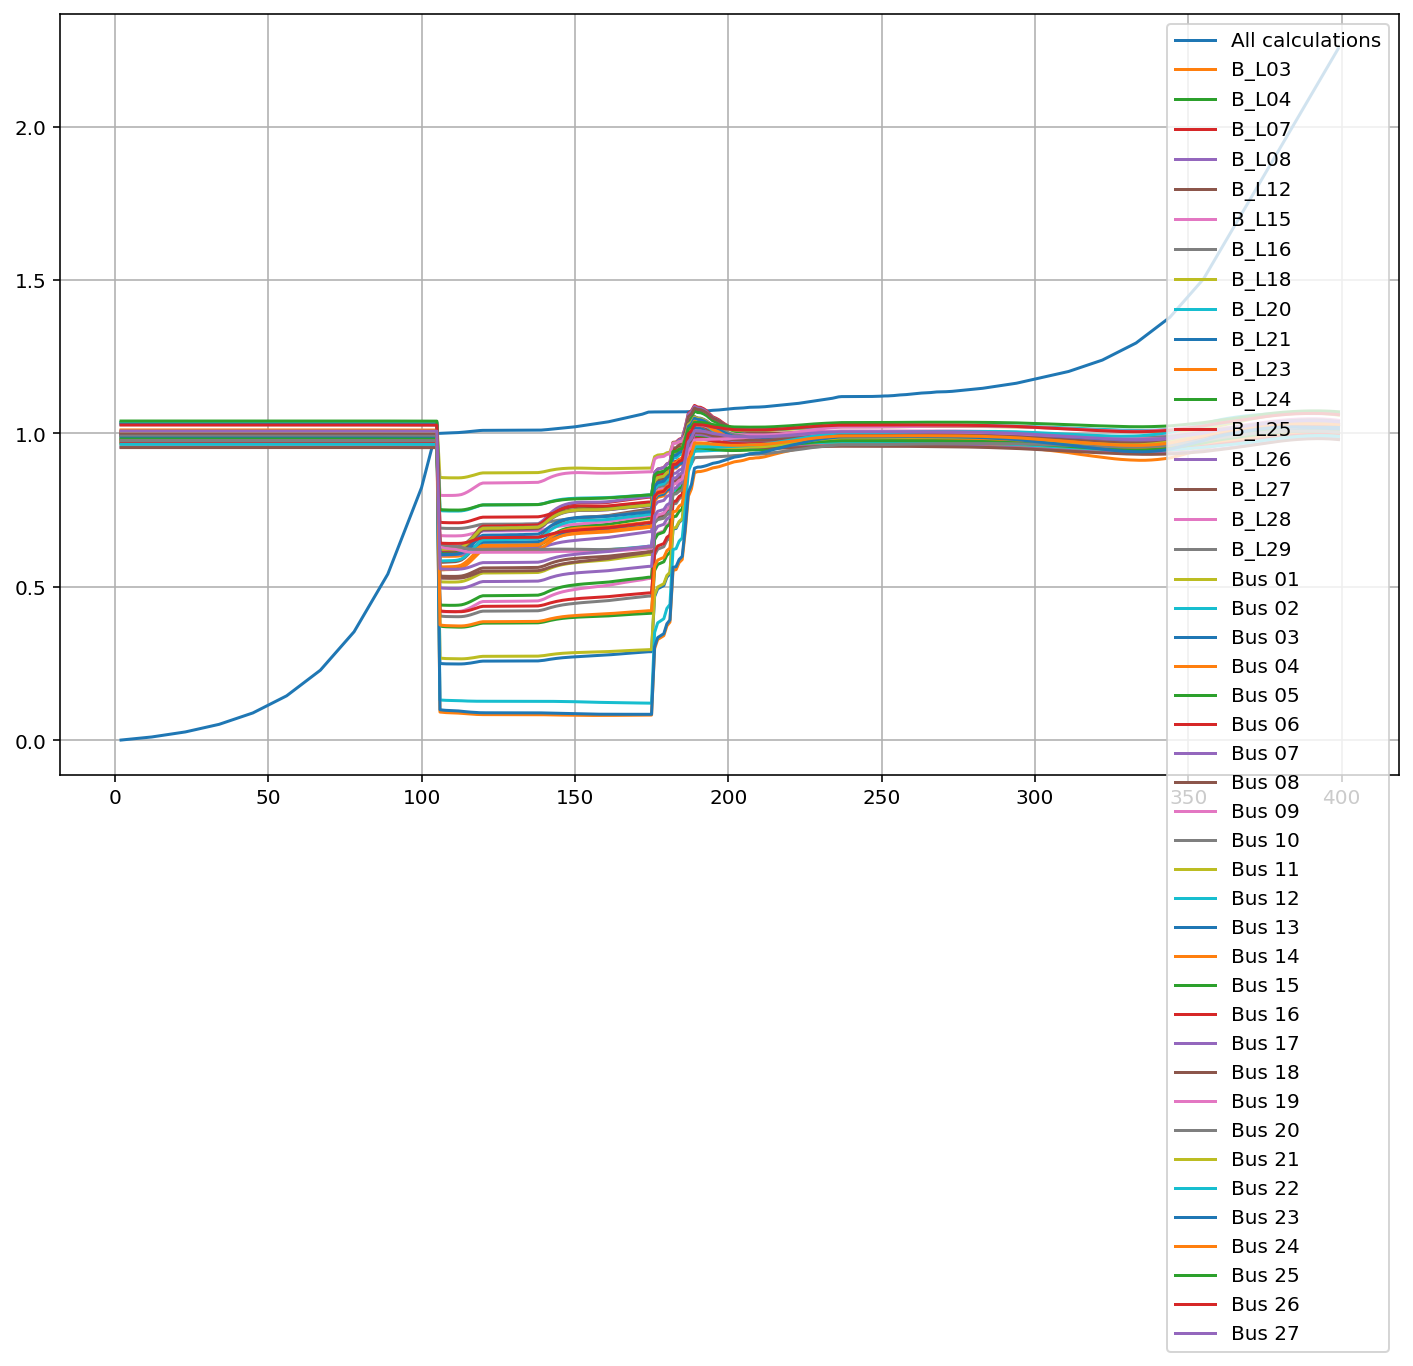

In [80]:
df.iloc[range(2,400),0:45].astype(float).plot(grid = True)
# this shows that the time samples are not uniform. Furthermore, these times neeed not be the same for all the scenarios. Thus, there is aneed for pre-processing the data. The preprocessing should be a simple interpolation and should result in a dataset with samples equally spaced in time with the same time stamps in all the scenarios (More about this when e meet tomorrow). Further, for 

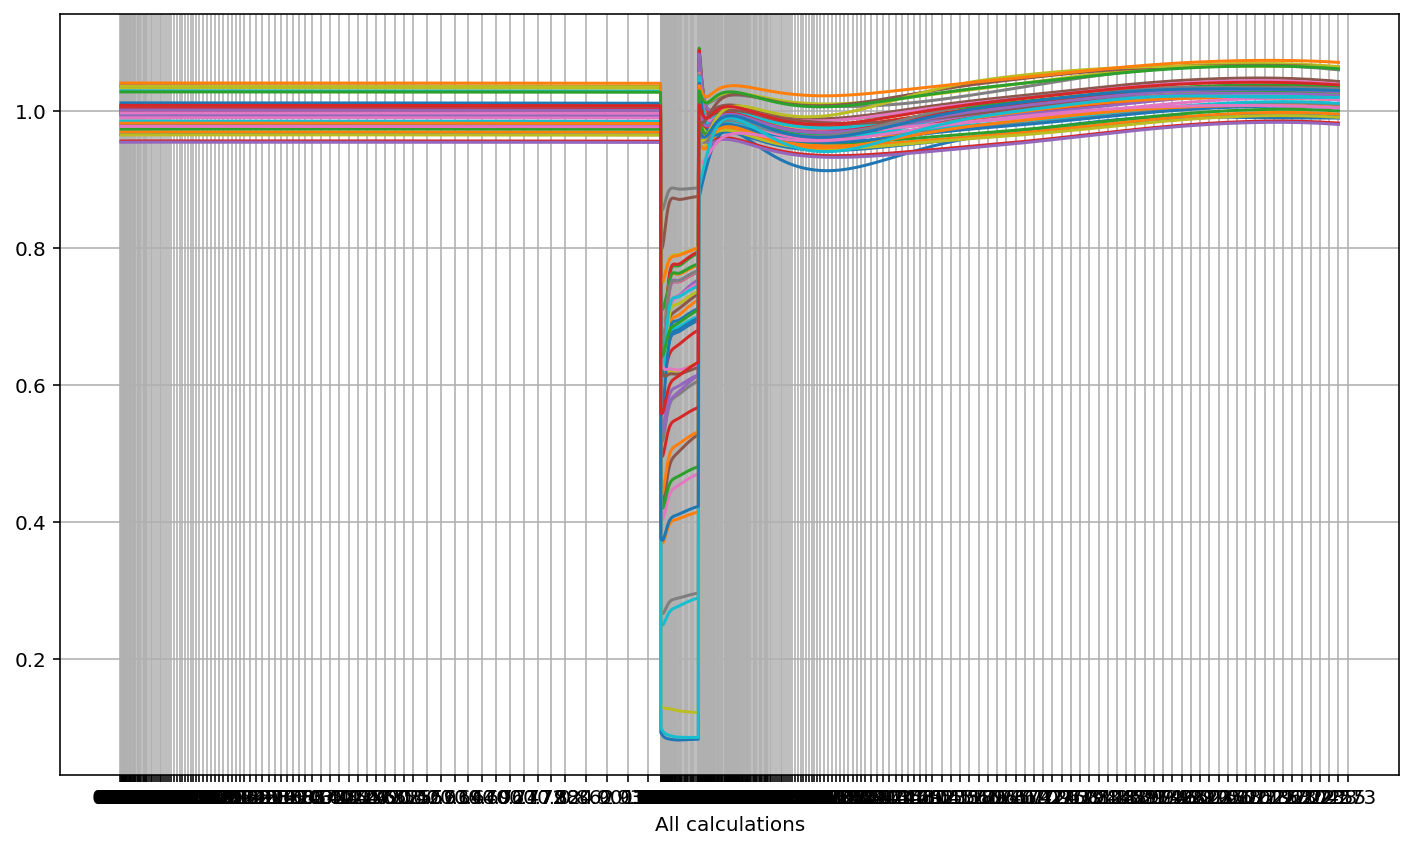

In [94]:
df.iloc[range(2,400),0:45].astype(float).plot(x = 0, legend = False, grid = True, xticks = t_simu[:400]) # poper plotting with x-axis as the time axis and no legend to save space. You can see that the fault duration is really small 

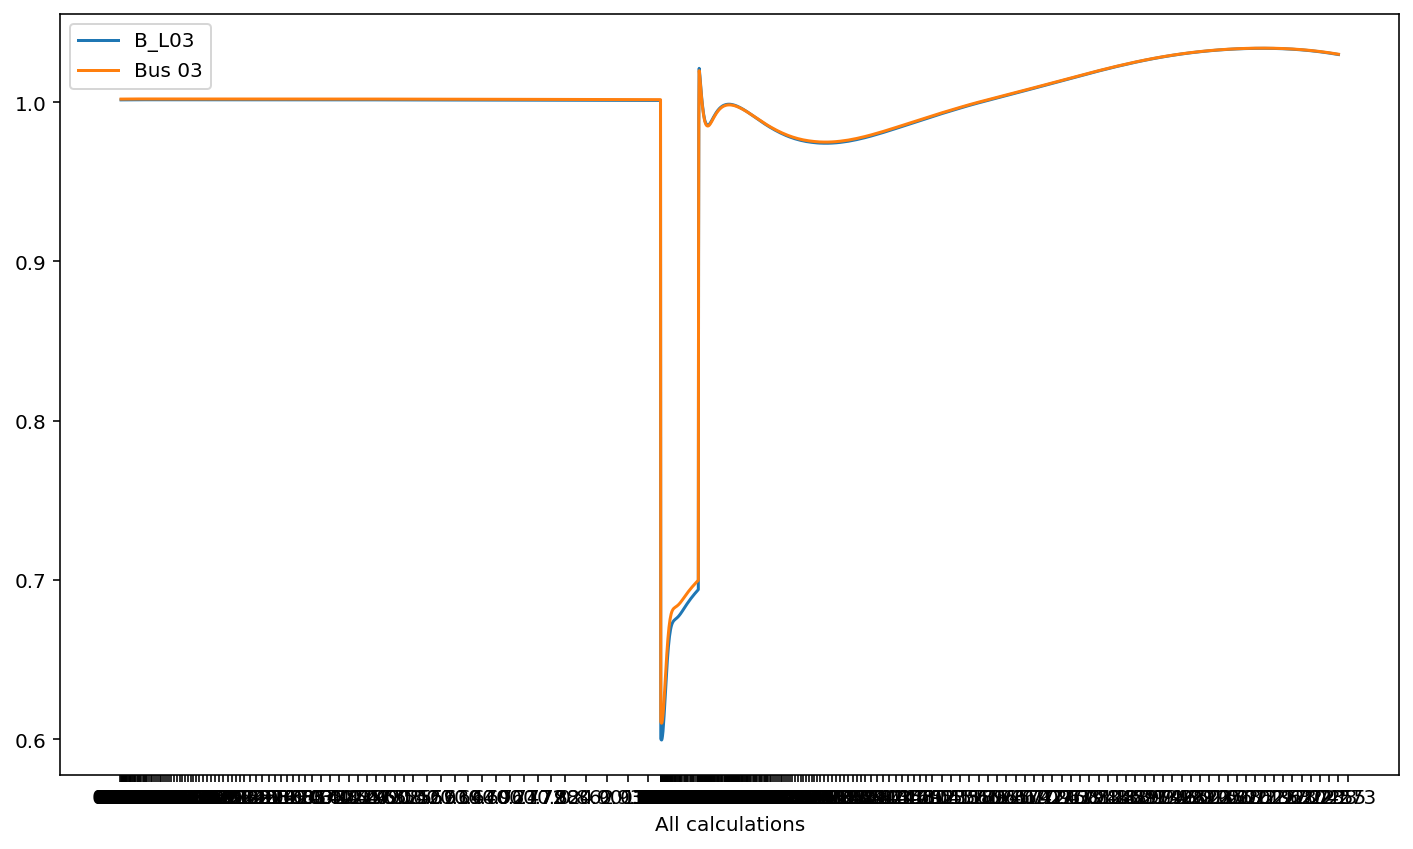

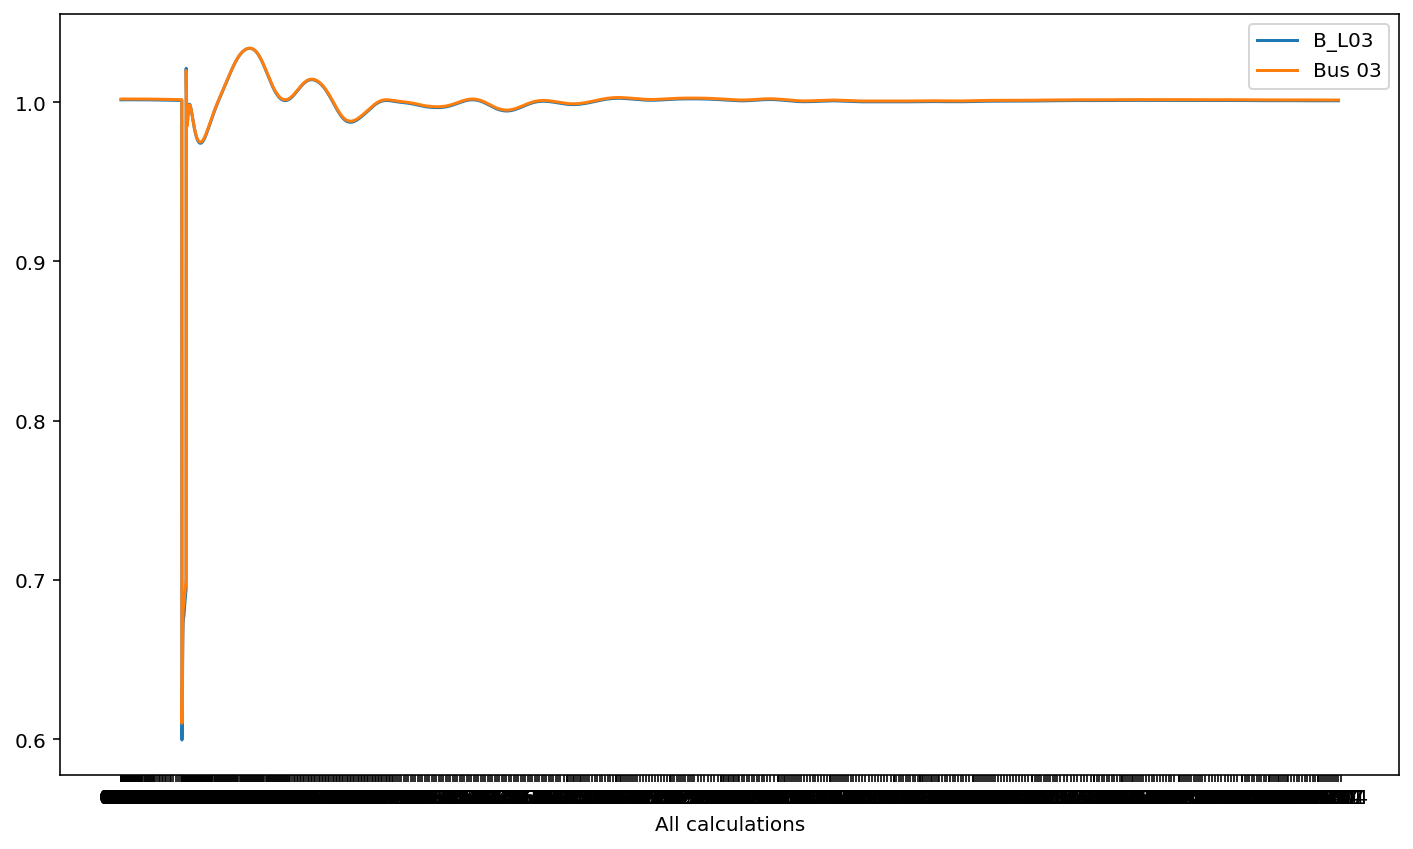

In [98]:
df.iloc[range(2,400),[0,1,20]].astype(float).plot(x = 0, legend = True, xticks = t_simu[:400]) 
df.iloc[range(2,900),[0,1,20]].astype(float).plot(x = 0, legend = True, xticks = t_simu[:900]) 
# there are actually two waveforms here but thery are nearly identical and so they are indistinguishable. Thus, we should remove one of these variables from our analysis. The case is similar for all the variables prefixed by "B_L".

In [70]:
a = [*range(90,98)]
print(a)

[90, 91, 92, 93, 94, 95, 96, 97]


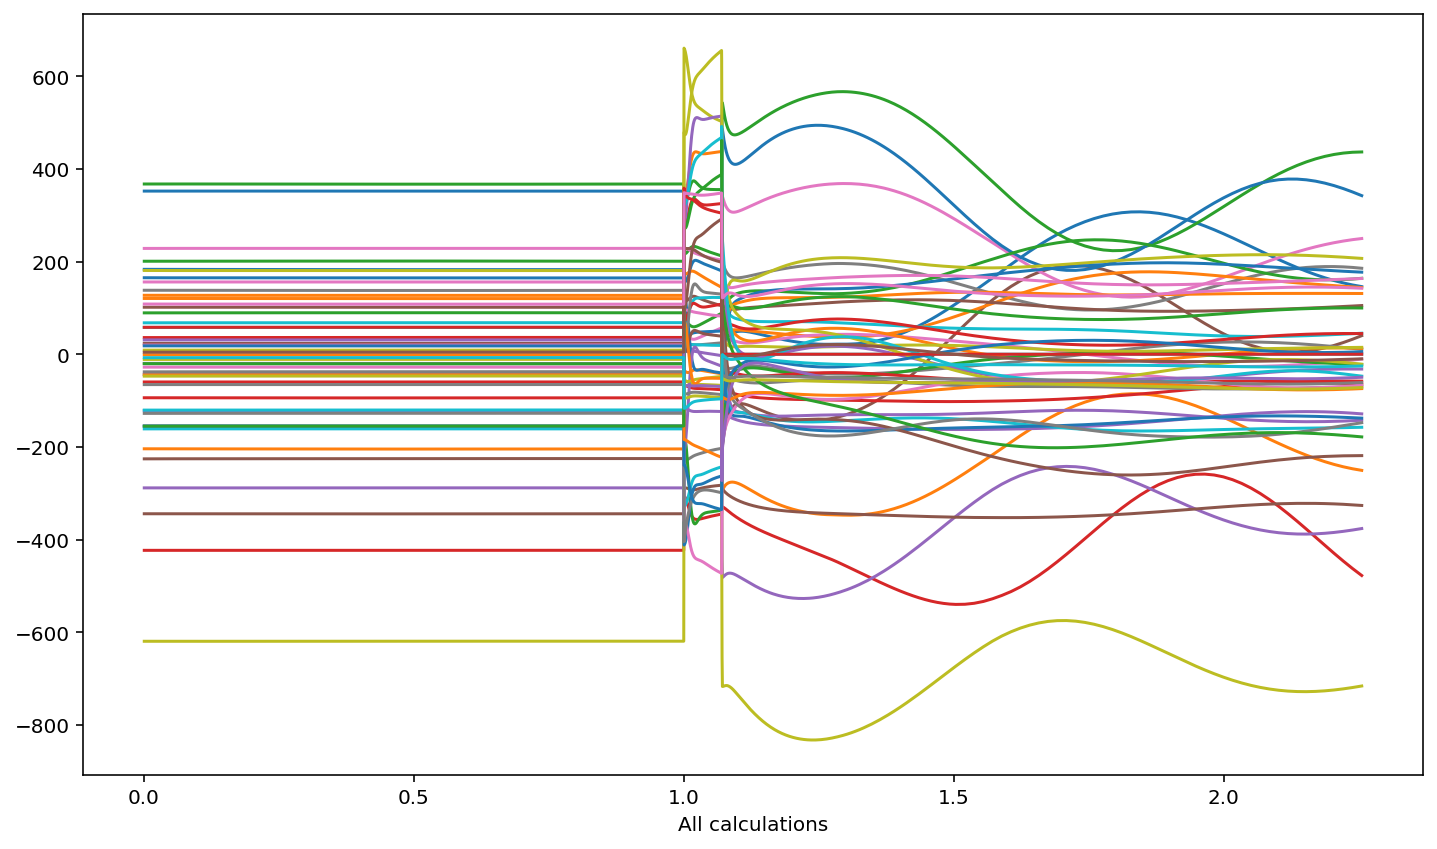

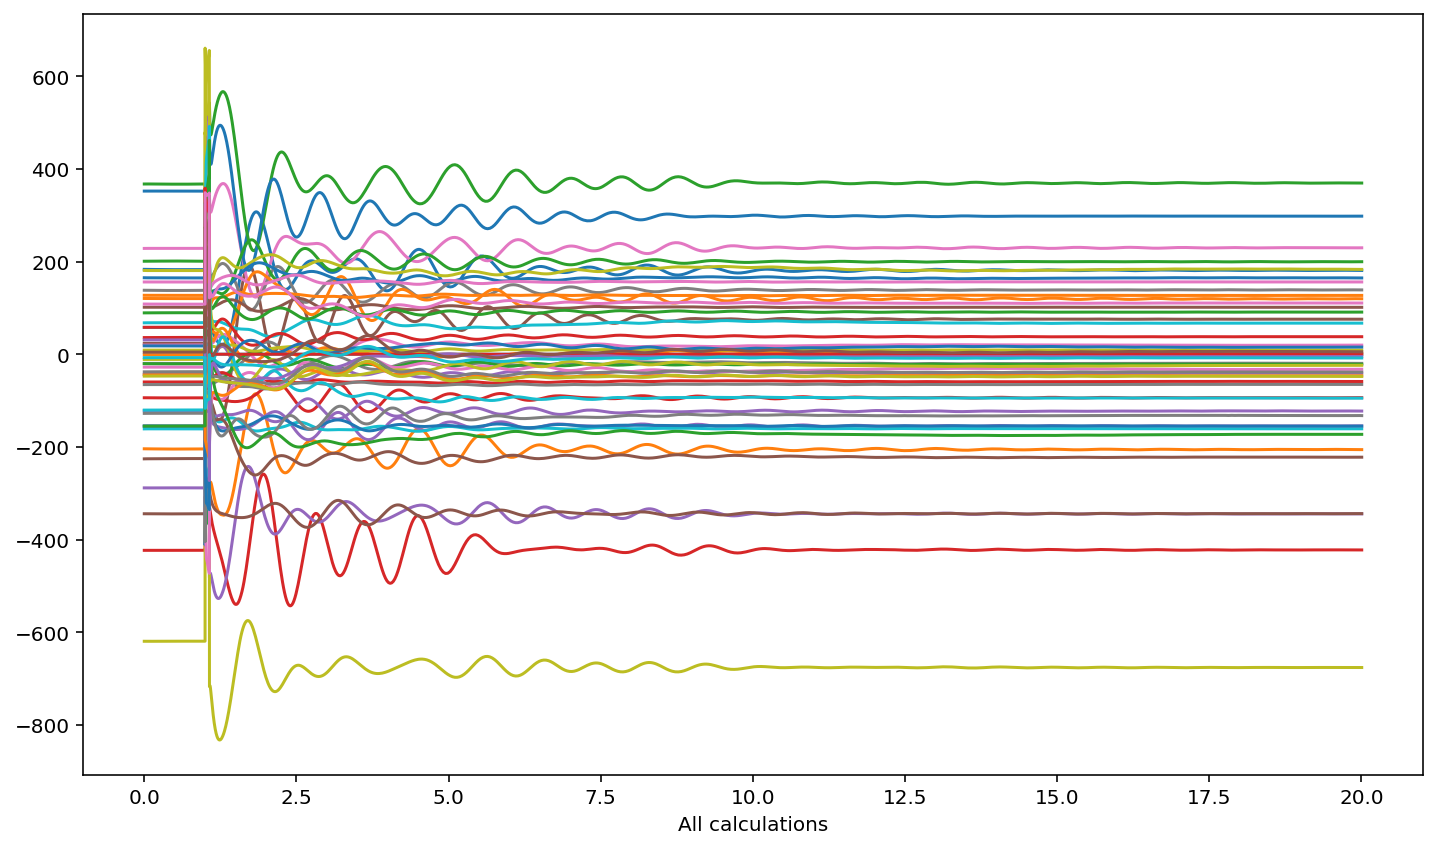

In [99]:
df.iloc[range(2,400),[0]+[*range(200,250)]].astype(float).plot(x = 0, legend = False)
df.iloc[range(2,900),[0]+[*range(200,250)]].astype(float).plot(x = 0, legend = False)
# this shows the plot of different variables (indexes 200-250) during the fault. Unlike the voltages that decreased when there is fault, these variables had a sudden rise during the fault and then they suddenly dropped after the fault is cleared. This is followed by large oscillations. The y-azis of these variables is very different in value. The oscillatory behavior is longer than the voltages.

## Points to ponder
+ Try reducing the number of variables based on the co-variance of the variables "closest electrically". This has to be done carefully as the covariances are dependent on the topology. The line connecting the two variables can disconnect for a small number of cases
- The variance of the various variables are not equal. Normalization might make this situation less lopsided, but I am not sure 
- I think the first step would be to create helper functions that can do the data reading and pre-processing in an automated manner for use in tensorflow training modules
- There are several kinds of classification tasks possible. The ones that come to my mind are listed below in increasing order of difficulty (based on my intuition)
- Cascade vs no cascade 
- Identify the reason for the first component outage
- Identify the locations of the first component outage
- Identify the reason for the first 5 outages
- Identify the locations for the first 5 outages
- Identify the time/time-period for the first outage